71 256 256


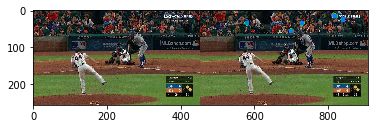

In [90]:
import cv2 
import os
import numpy as np 
from matplotlib import pyplot as plt 


'''This is the command to read in the GIF. You need Videocapture which makes a cv2 Video Object.
Add your GIF file name in the parameter of this function.
'''

def convert_gif_to_frames(gif):

    # Initialize the frame number and create empty frame list
    frame_num = 0
    frame_list = []

    # Loop until there are frames left
    while True:
        try:
            # Try to read a frame. Okay is a BOOL if there are frames or not
            okay, frame = gif.read()
            # Append to empty frame list
            frame_list.append(frame)
            # Break if there are no other frames to read
            if not okay:
                break
            # Increment value of the frame number by 1
            frame_num += 1
        except KeyboardInterrupt:  # press ^C to quit
            break

    return frame_list


def output_frames_as_pics(frame_list):

    # Reduce the list of frames by half to make the list more managable
    frame_list_reduce = frame_list[0::2]
    # Get the path of the current working directory
    path = os.getcwd()
    # Set then name of your folder
    '''Replace this name with what you want your folder name to be'''
    folder_name = 'Picturebook_Pics_Kiss'
    # If the folder does not exist, then make it
    if not os.path.exists(path + '/' + folder_name):
        os.makedirs(path + '/' + folder_name)

    for frames_idx in range(len(frame_list_reduce)):
        cv2.imwrite(os.path.join(path + '/' + folder_name, str(frames_idx+1) + '.png'), frame_list_reduce[frames_idx])

def detect_and_show_circles(input_img, output_img):
    # detect circles in the image
    input_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(input_gray, cv2.HOUGH_GRADIENT, 10, 1, maxRadius=9)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")

        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output_img, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output_img, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

        # show the output image
        plt.imshow(np.hstack([input_img, output_img]))


gif_ball = cv2.VideoCapture('ball2.gif')

frame_list = convert_gif_to_frames(gif_ball)
print(len(frame_list), len(frame_list[0]), len(frame_list[1]))
im_cv = frame_list[35]

im_rgb = cv2.cvtColor(im_cv, cv2.COLOR_BGR2RGB)
output = im_rgb.copy()
# plt.imshow(im_rgb)
detect_and_show_circles(im_rgb, output)